In [54]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt
import pickle
import import_ipynb
import sys
sys.path.append('./../../')
import statsmodels.api as sm
import Portfolio_value as pv

In [55]:
df = pd.read_csv('./../../data/data.csv')

In [56]:
p_val = np.load('./../../result/p_val/p_val_const.npy', allow_pickle=True)
w_val = np.load('./../../result/w_val/w_val_const.npy', allow_pickle=True)

p_val = p_val.reshape(1)
p_val = p_val[0]

w_val = w_val.reshape(1)
w_val = w_val[0]

In [57]:
upper_year = 30
withdraw_rate = 0.08
print('limit:', 2023-upper_year-1)

limit: 1992


In [58]:
x = {}
amount = {}
init_wealth = 350000
for k in list(np.arange(2,9)/10):
    x[k] = []
    amount[k] = []
    for year in range(1980, 2023-upper_year):
        x[k].append(year)
        res = pv.get_metric(year, k, upper_year, withdraw_rate, df, init_wealth, p_val, w_val)
        amount[k].append(res[0]+res[1])

In [59]:
avg = {}
for k in list(np.arange(2,9)/10):
    avg[k] = np.mean(amount[k])

In [60]:
x.keys()

dict_keys([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8])

In [61]:

for k in list(x.keys()):
    year_print = ''
    for i in range(len(x[k])):
        year_print = year_print + ' & ' + str(x[k][i])

print(year_print)
for k in list(x.keys()):
    amount_print = '{}:{} strategy'.format(int(k*100),int((1-k)*100))
    for i in range(len(x[k])):
        year_print = year_print + ' & ' + str(x[k][i])
        amount_print = amount_print + ' & ' + str(np.round(amount[k][i],1))
    print(amount_print)

 & 1980 & 1981 & 1982 & 1983 & 1984 & 1985 & 1986 & 1987 & 1988 & 1989 & 1990 & 1991 & 1992
20:80 strategy & 112.0 & 132.4 & 125.6 & 132.4 & 132.4 & 132.4 & 125.6 & 112.0 & 98.0 & 90.9 & 90.9 & 98.0 & 98.0
30:70 strategy & 118.8 & 139.1 & 132.4 & 139.1 & 139.1 & 139.1 & 132.4 & 112.0 & 90.9 & 83.7 & 83.7 & 98.0 & 98.0
40:60 strategy & 118.8 & 139.1 & 139.1 & 145.7 & 145.7 & 145.7 & 139.1 & 112.0 & 90.9 & 83.7 & 83.7 & 90.9 & 90.9
50:50 strategy & 125.6 & 145.7 & 145.7 & 152.2 & 152.2 & 145.7 & 145.7 & 112.0 & 90.9 & 76.5 & 76.5 & 90.9 & 83.7
60:40 strategy & 125.6 & 152.2 & 145.7 & 158.7 & 158.7 & 152.2 & 145.7 & 112.0 & 83.7 & 76.5 & 69.2 & 83.7 & 83.7
70:30 strategy & 125.6 & 152.2 & 152.2 & 158.7 & 158.7 & 152.2 & 145.7 & 112.0 & 83.7 & 76.5 & 69.2 & 83.7 & 76.5
80:19 strategy & 125.6 & 152.2 & 152.2 & 158.7 & 158.7 & 152.2 & 145.7 & 112.0 & 83.7 & 69.2 & 69.2 & 76.5 & 76.5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


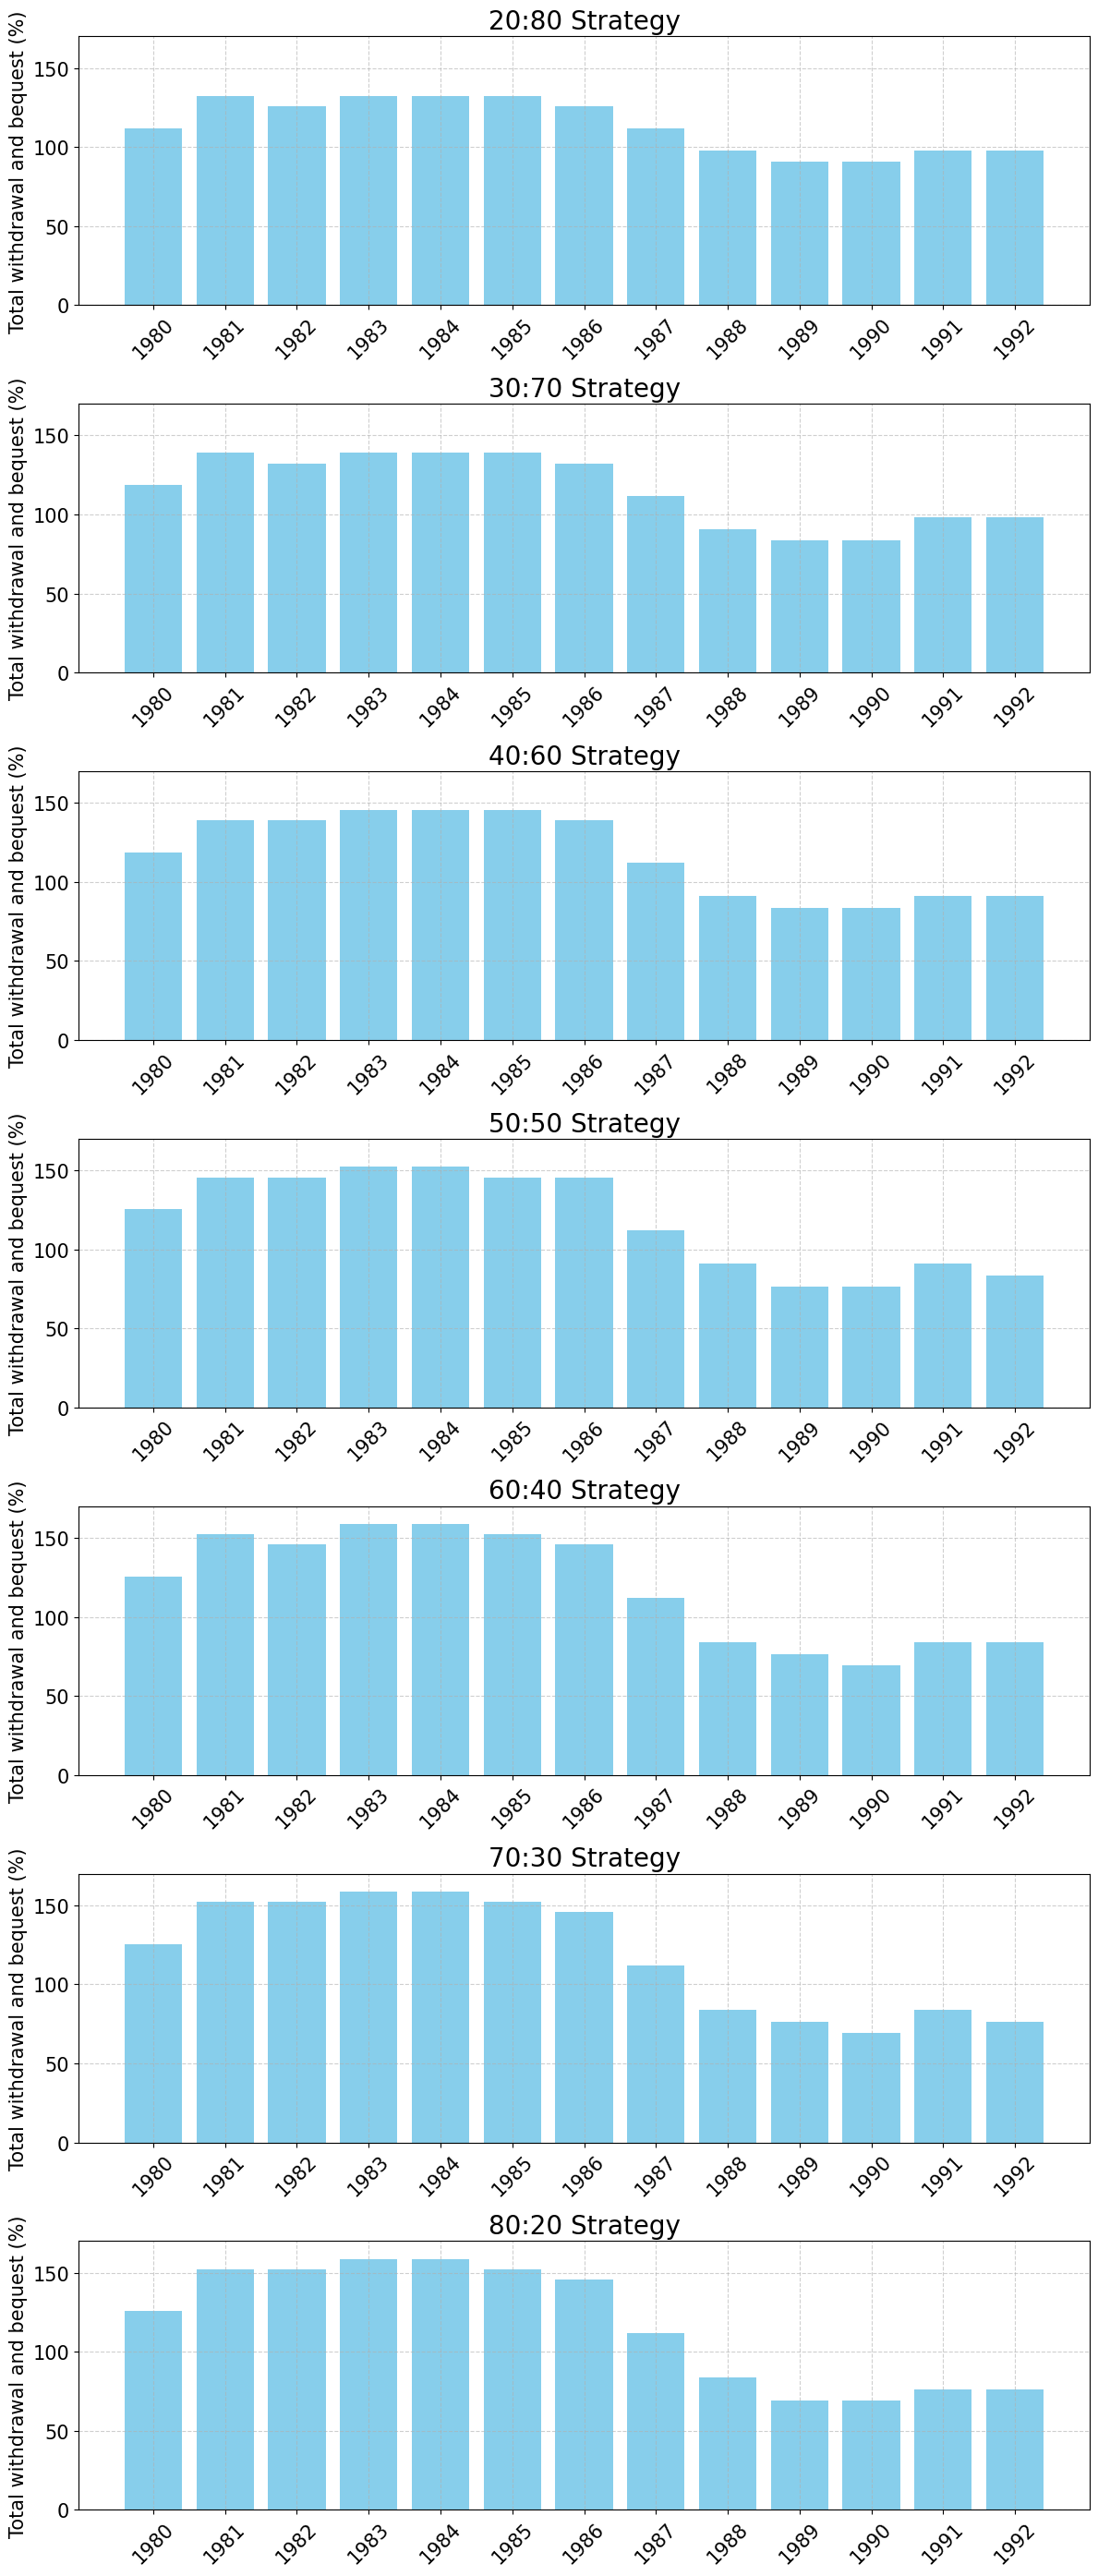

In [62]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

x = {k: [int(i) for i in v] for k, v in x.items()}

fig, axs = plt.subplots(7, figsize=(12,28))

up_lim = int('{}'.format(upper_year))+1
for i, k in enumerate(list(np.arange(2,9)/10)):
    axs[i].set_ylim([0, 170])
    axs[i].bar(x[k], amount[k], color='skyblue')
    axs[i].set_title('{}:{} Strategy'.format(int(k*100),int(100-k*100)), size=20)
    # axs[0].set_xlabel('Retirement Years', size=20)
    axs[i].set_ylabel('Total withdrawal and bequest (%)', size=15)
    axs[i].set_xticks(x[k])
    axs[i].tick_params(axis='both', labelsize=15)
    plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)
    axs[i].grid(True, linestyle='--', alpha=0.6)

formatter = ticker.FuncFormatter(lambda x, pos: '{:d}'.format(int(x)))

# Set the formatter for each axis
for ax in axs.flat:
    ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig("./amount_{}.eps".format(upper_year), format="eps", bbox_inches="tight")
plt.show()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


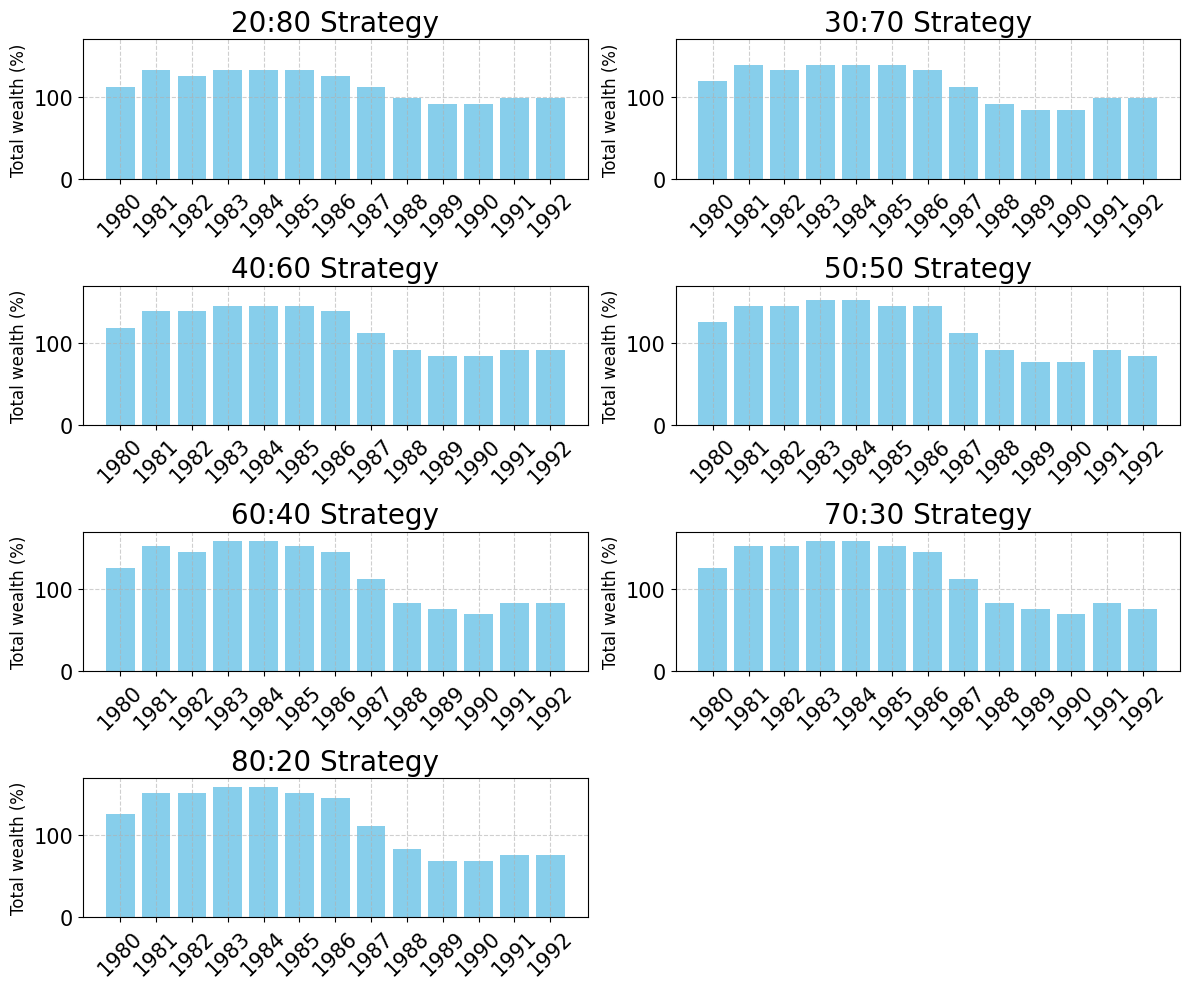

In [63]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

x = {k: [int(i) for i in v] for k, v in x.items()}

# Change the subplot configuration to 4 rows and 2 columns
fig, axs = plt.subplots(4, 2, figsize=(12,10))  # Adjust figsize as needed

up_lim = int('{}'.format(upper_year))+1
plot_index = 0
for i, k in enumerate(list(np.arange(2,9)/10)):
    # Use divmod to find row, column index
    row, col = divmod(plot_index, 2)
    ax = axs[row, col]

    ax.set_ylim([0, 170])
    ax.bar(x[k], amount[k], color='skyblue')
    ax.set_title('{}:{} Strategy'.format(int(k*100),int(100-k*100)), size=20)
    ax.set_ylabel('Total wealth (%)', size=12)
    ax.set_xticks(x[k])
    ax.tick_params(axis='both', labelsize=15)
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    plot_index += 1

formatter = ticker.FuncFormatter(lambda x, pos: '{:d}'.format(int(x)))

# Set the formatter for each axis
for ax in axs.flat:
    ax.xaxis.set_major_formatter(formatter)

# Hide the last subplot if it's not needed
if plot_index < 8:
    axs[-1, -1].axis('off')

plt.tight_layout()
plt.savefig("./amount_{}.eps".format(upper_year), format="eps", bbox_inches="tight")
plt.show()


In [41]:
yyyys = list(p_val['year20_k0.5_rate0.06'].keys())

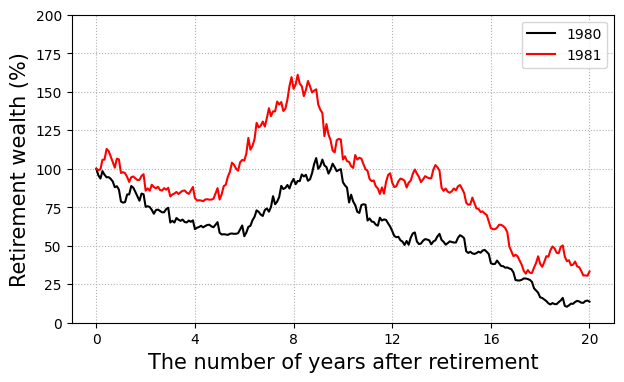

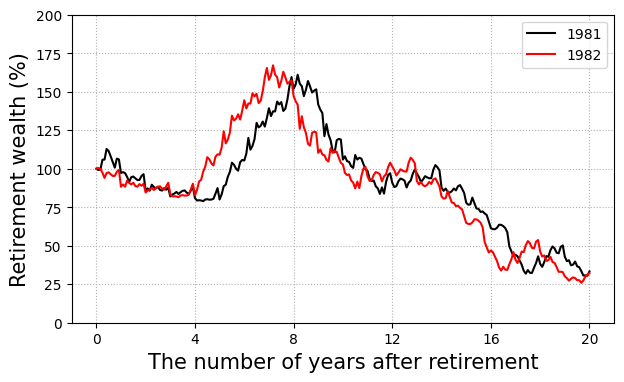

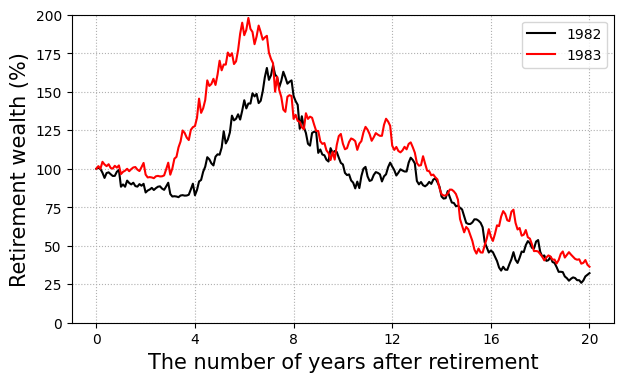

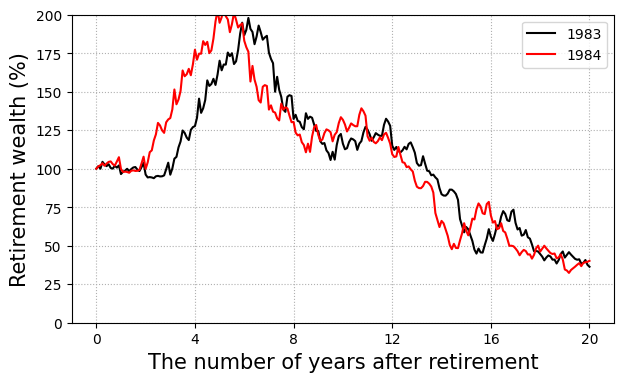

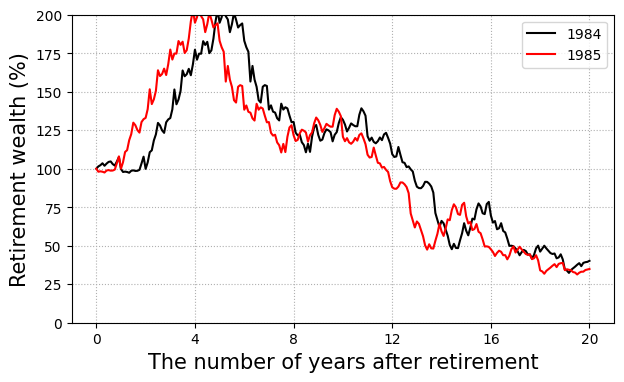

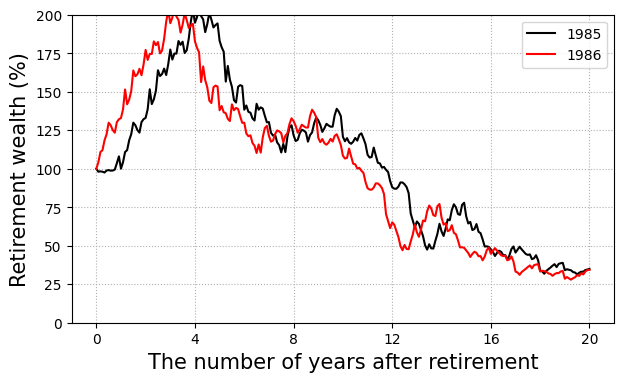

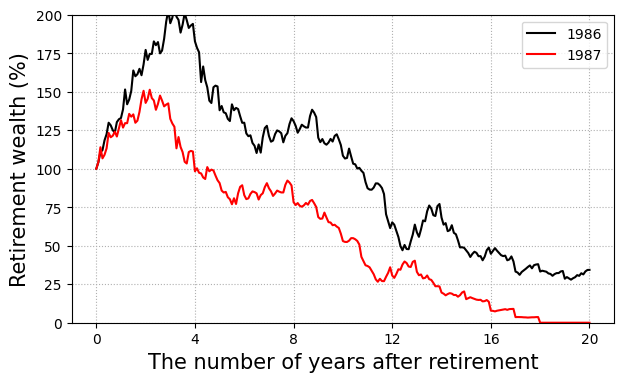

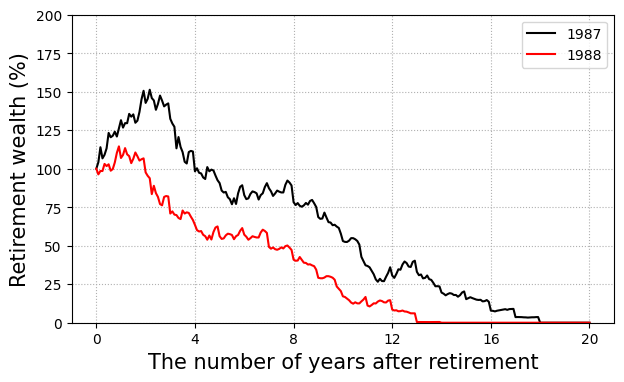

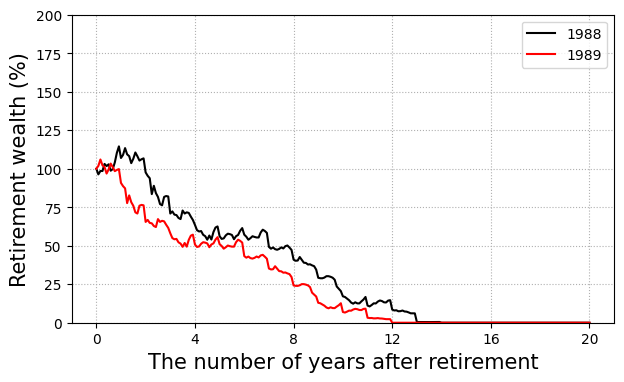

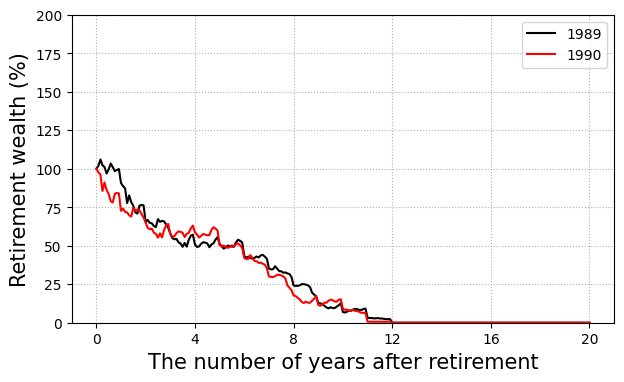

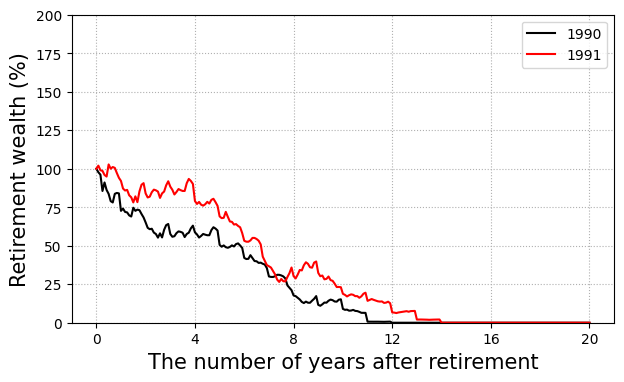

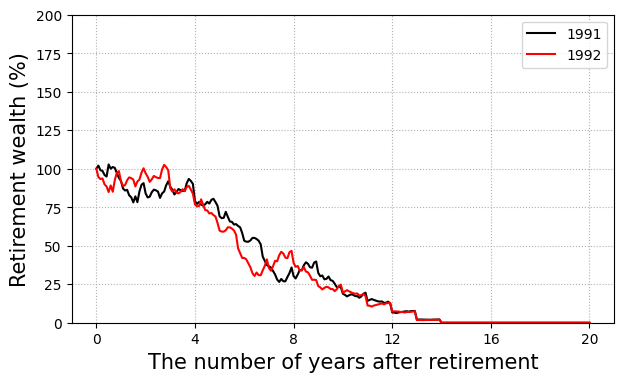

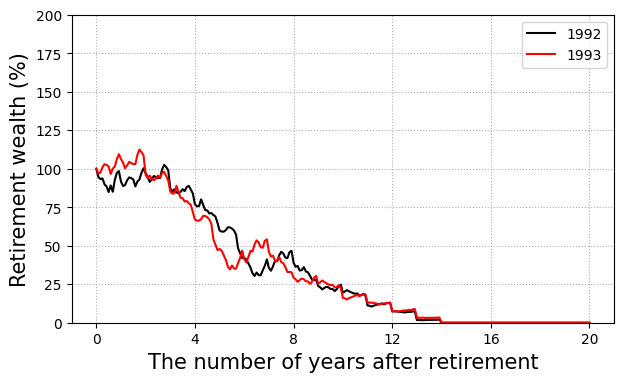

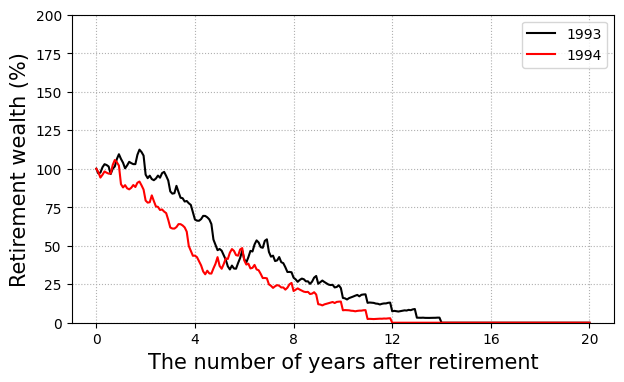

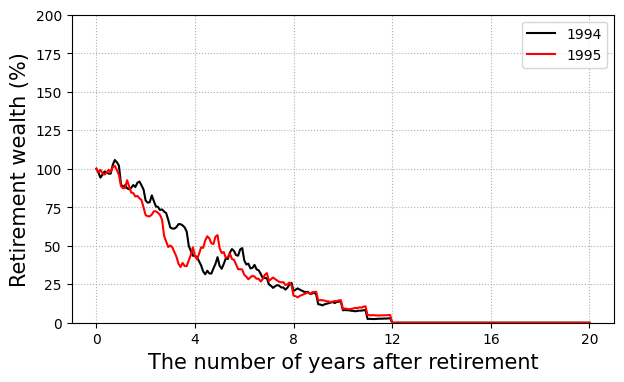

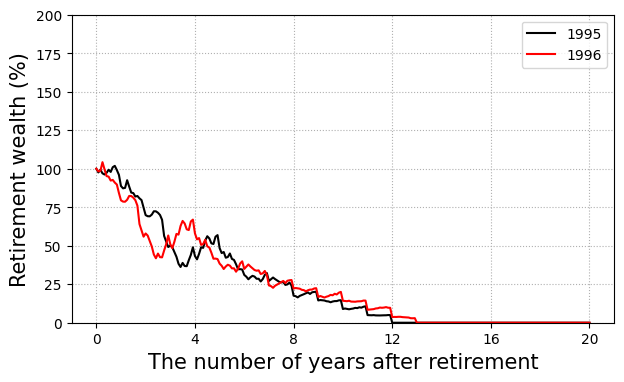

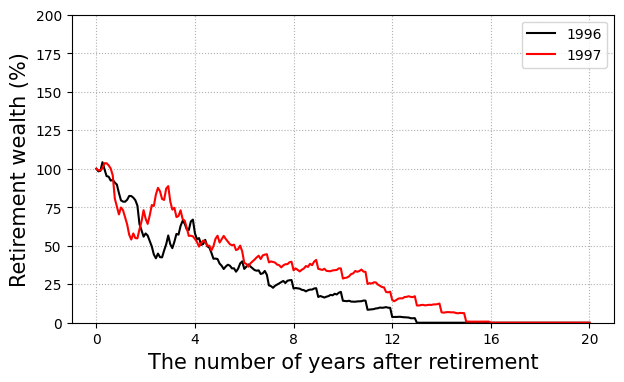

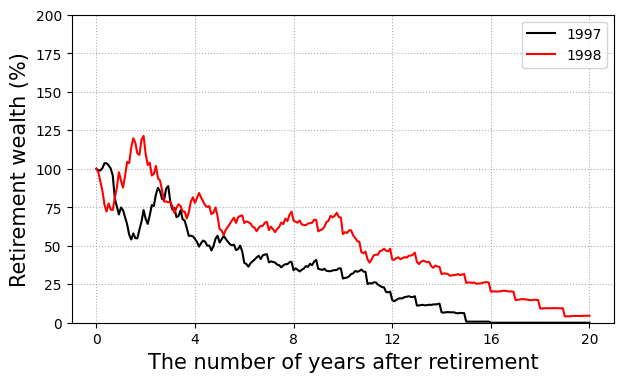

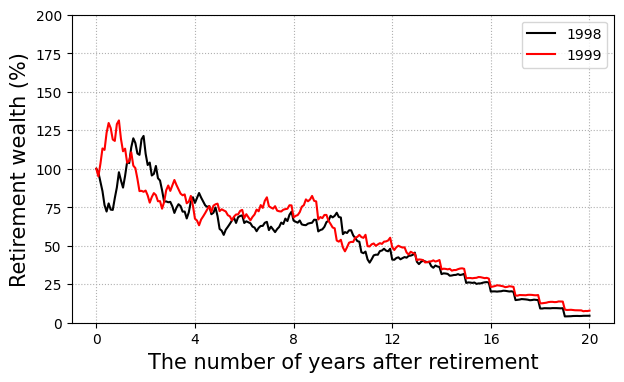

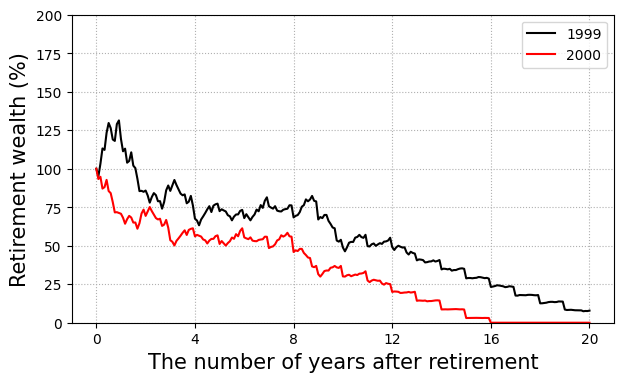

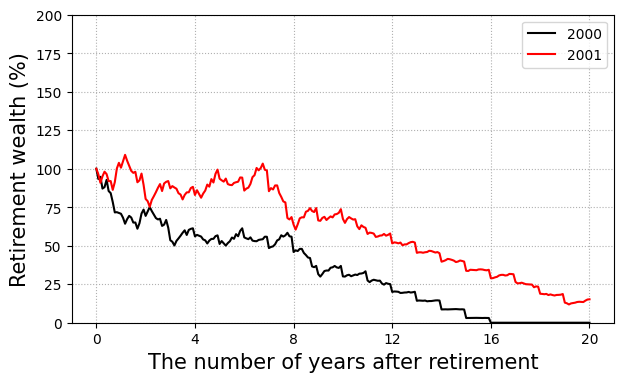

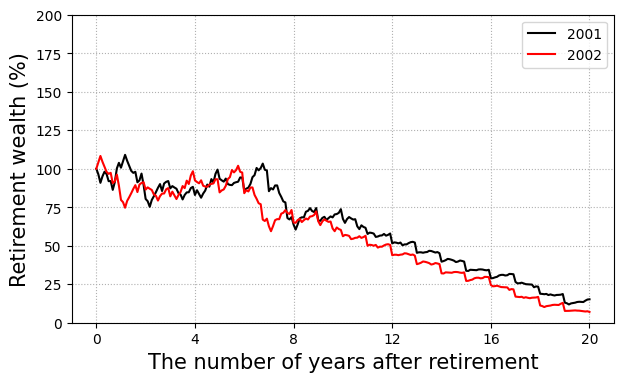

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Set the figure size
for i in range(len(yyyys)-1):
    x = np.arange(0,241)/12
    plt.figure(figsize=(7,4))

    # Set the color of the lines
    plt.plot(x, p_val['year20_k0.5_rate0.06'][yyyys[i]], label='{}'.format(yyyys[i]), color='black')
    plt.plot(x, p_val['year20_k0.5_rate0.06'][yyyys[i+1]], label='{}'.format(yyyys[i+1]), color='red')

    # Set the labels for the axes
    plt.xlabel('The number of years after retirement', size=15)
    plt.ylabel('Retirement wealth (%)', size=15)

    plt.ylim(0,200)

    # Adjust x-axis to show integer values with step size 4
    plt.xticks(np.arange(min(x), max(x)+1, 4))
    
    # Add dotted grid
    plt.grid(True, linestyle=':')

    plt.legend()
    plt.show()
    plt.close()


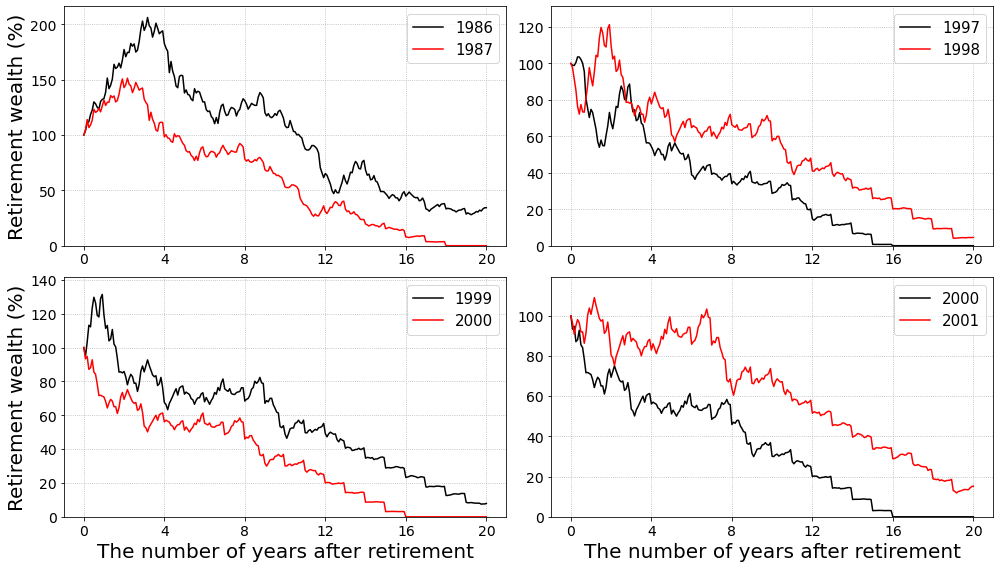

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Define the years of interest
years_of_interest = [1986, 1997, 1999, 2000]

# Set the figure size
fig, axs = plt.subplots(2, 2, figsize=(14,8))

for index, year in enumerate(years_of_interest):
    i = yyyys.index(year)  # Find the index of the year
    x = np.arange(0,241)/12

    # Set the color of the lines
    y1 = p_val['year20_k0.5_rate0.06'][yyyys[i]]
    axs[index//2, index%2].plot(x, y1, label='{}'.format(yyyys[i]), color='black')

    # If there's a next year, plot it
    y2 = []
    if i + 1 < len(yyyys):
        y2 = p_val['year20_k0.5_rate0.06'][yyyys[i+1]]
        axs[index//2, index%2].plot(x, y2, label='{}'.format(yyyys[i+1]), color='red')

    # Set the labels for the axes
    if index%2 == 0:
        axs[index//2, index%2].set_ylabel('Retirement wealth (%)', size=20)
    if index == 2 or index == 3:
        axs[index//2, index%2].set_xlabel('The number of years after retirement', size=20)
        

    # Set the y-axis upper limit to the maximum value of your plot data
    axs[index//2, index%2].set_ylim(0, max(np.max(y1), np.max(y2))+10)

    # Adjust x-axis to show integer values with step size 4
    axs[index//2, index%2].set_xticks(np.arange(min(x), max(x)+1, 4))
    # Add dotted grid
    axs[index//2, index%2].grid(True, linestyle=':')
    axs[index//2, index%2].tick_params(axis='both', which='major', labelsize=14)
    axs[index//2, index%2].legend(fontsize=15)

# Save the figure
plt.tight_layout()
plt.savefig('sequence_risk_2.pdf')
plt.show()
plt.close()


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


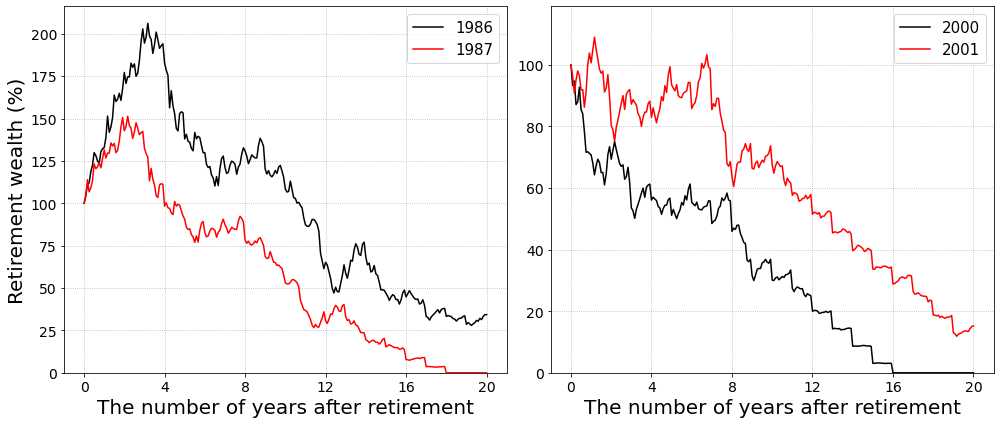

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Define the years of interest
years_of_interest = [1986, 2000]

# Set the figure size
fig, axs = plt.subplots(1, 2, figsize=(14,6))

for index, year in enumerate(years_of_interest):
    i = yyyys.index(year)  # Find the index of the year
    x = np.arange(0,241)/12

    # Set the color of the lines
    y1 = p_val['year20_k0.5_rate0.06'][yyyys[i]]
    axs[index].plot(x, y1, label='{}'.format(yyyys[i]), color='black')

    # If there's a next year, plot it
    y2 = []
    if i + 1 < len(yyyys):
        y2 = p_val['year20_k0.5_rate0.06'][yyyys[i+1]]
        axs[index].plot(x, y2, label='{}'.format(yyyys[i+1]), color='red')

    # Set the labels for the axes
    if index == 0:
        axs[index].set_ylabel('Retirement wealth (%)', size=20)
    
    axs[index].set_xlabel('The number of years after retirement', size=20)
        
    # Set the y-axis upper limit to the maximum value of your plot data
    axs[index].set_ylim(0, max(np.max(y1), np.max(y2))+10)

    # Adjust x-axis to show integer values with step size 4
    axs[index].set_xticks(np.arange(min(x), max(x)+1, 4))
    # Add dotted grid
    axs[index].grid(True, linestyle=':')
    axs[index].tick_params(axis='both', which='major', labelsize=14)
    axs[index].legend(fontsize=15)

# Save the figure
plt.tight_layout()
plt.savefig("./sequence_risk_2.eps", format="eps", bbox_inches="tight")
plt.show()
plt.close()
